In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

Compare the analytical cosmic ray spectrum in [Phys. Atom. Nuclei 69, 1293–1298 (2006)](https://link.springer.com/article/10.1134/S1063778806080047) to the data measured in Neutrino Alley (by Yuri Efermenko).
The analytical form considers cosmic rays from 1 GeV/c to $10^5$ GeV/c

Eq (1) in this paper is in unit of /($cm^2\cdot s\cdot sr$).  If integrating p from 1 to 1e5 GeV/c, at $\theta$ =0, we get 0.0076 muons from Eq (1), corresponding to 76 muons/($m^2\cdot s\cdot sr$), which matches the text describing the vertical flux.

Yuri mentioned the overburden of Neutrino Alley cuts off the muons with momentum less than 2-3 GeV/c.  Here I am using 3 GeV/c as the cutoff number.

In [2]:
# momentum range in GeV/c
pmin = 3
pmax = 100000

In [3]:
# Analytical cosmic ray flux from the paper
def dI_fixedTheta(p, theta):
    return 18/(p*np.cos(theta)+145)* (1./np.power((p+2.7/np.cos(theta)), 2.7))* (p+5)/(p+5/np.cos(theta))

In [4]:
# 1-D integral
theta = 0
Iv = integrate.quad(dI_fixedTheta, pmin, pmax, args = (theta))
Iv

(0.0035574258942180173, 1.0291962483084904e-08)

My double integral (not tested yet)
> def dIdpdcosth(theta):
>
>     return integrate.quad(dIdp, 1, 100000, args = (theta,))

In [5]:
# Analytical cosmic ray flux times Jacobian (for the solid angle)
def dI(theta, p):
    return 18/(p*np.cos(theta)+145)* np.power((p+2.7/np.cos(theta)), -2.7)* (p+5)/(p+5/np.cos(theta))* 2*np.pi*np.sin(theta)

In [6]:
I = integrate.dblquad(dI, pmin, pmax, 0, 7/44)
I

(0.00028011993254451655, 7.736820094347712e-10)

In Yuri's setup configuration, the $\phi$ angle goes from 0 to 14/(44$\sin\theta$), while $\theta$ goes from $\theta_0$-7/44 to $\theta_0$+7/44.  Therefore the Jacobian becomes

$\int^{\theta_0+7/44}_{\theta_0-7/44}\int^{14/(44\sin\theta)}_0 d\phi\sin\theta d\theta dI(\theta)$

Since it is symmetric in $\phi$

$ = \int^{\theta_0+7/44}_{\theta_0-7/44} \frac{14}{44\sin\theta}\sin\theta d\theta dI(\theta) 
= \frac{14}{44}\int^{\theta_0+7/44}_{\theta_0-7/44} d\theta dI(\theta)$

In [7]:
# Analytical cosmic ray flux multiplied by the solid angle used in the experiment
def dIexp(theta, p):
    return 18/(p*np.cos(theta)+145)* np.power((p+2.7/np.cos(theta)), -2.7)* (p+5)/(p+5/np.cos(theta))* (14/44)

In [8]:
# Theta points taken from Yuri's measurement
thetaArray = np.array([-80, -70, -60, -45, -30, -15, 0, 15, 30, 45, 60, 70, 80])
thetaLowerBinEdge = np.array([15, 30, 45, 60, 70, 80])*np.pi/180-7/44
thetaUpperBinEdge = np.array([15, 30, 45, 60, 70, 80])*np.pi/180+7/44
# thetaUpperBinEdge = np.concatenate([thetaLowerBinEdge[1:], [85]])
thetaLowerBinEdge, thetaUpperBinEdge

(array([0.10270848, 0.36450787, 0.62630725, 0.88810664, 1.06263957,
        1.23717249]),
 array([0.4208903 , 0.68268968, 0.94448907, 1.20628846, 1.38082139,
        1.55535431]))

In [9]:
IHalfArray = np.array([
    integrate.dblquad(dIexp, pmin, pmax, theta_a, theta_b)
    for theta_a, theta_b in zip(thetaLowerBinEdge, thetaUpperBinEdge) 
])
IHalfArray

array([[3.43509496e-04, 7.53567950e-10],
       [2.99465952e-04, 2.92852292e-10],
       [2.28391415e-04, 4.36875603e-11],
       [1.37910564e-04, 6.47716314e-09],
       [7.63093210e-05, 1.08737332e-10],
       [2.68985846e-05, 4.18960641e-09]])

In [10]:
# At theta = 0, the phi is integrated over 2pi, and I use the normal Jacobian
IVertical = integrate.dblquad(dI, pmin, pmax, 0, 7/44)
# As the integrand is symmetric w.r.t. theta, I integrate from 0 to 7/44 and multiply by 2
IVertical

(0.00028011993254451655, 7.736820094347712e-10)

In [11]:
np.flip(IHalfArray[:,0])

array([2.68985846e-05, 7.63093210e-05, 1.37910564e-04, 2.28391415e-04,
       2.99465952e-04, 3.43509496e-04])

In [12]:
IValue = np.concatenate((np.flip(IHalfArray[:,0]), [IVertical[0]], IHalfArray[:,0]))
IValue

array([2.68985846e-05, 7.63093210e-05, 1.37910564e-04, 2.28391415e-04,
       2.99465952e-04, 3.43509496e-04, 2.80119933e-04, 3.43509496e-04,
       2.99465952e-04, 2.28391415e-04, 1.37910564e-04, 7.63093210e-05,
       2.68985846e-05])

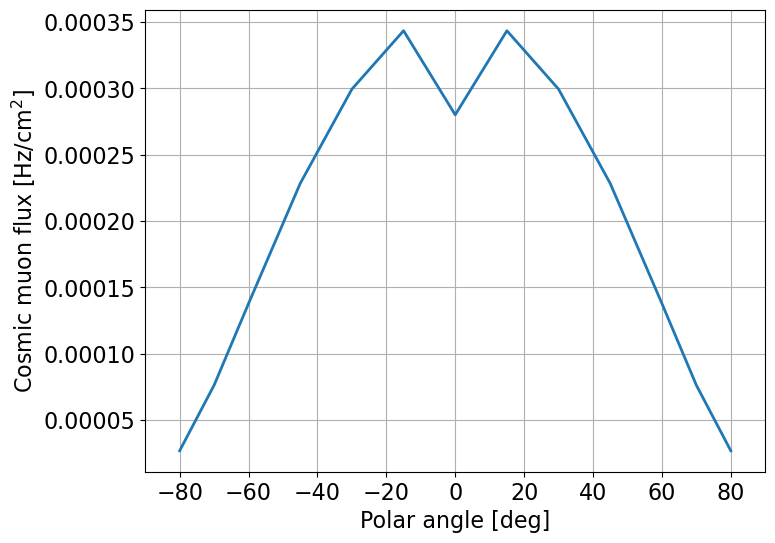

In [13]:
fig, ax = plt.subplots( figsize = (8, 6))  
ax.plot(thetaArray, IValue, lw = 2 )
ax.set_xlabel( r'Polar angle [deg]', fontsize = 16 )
ax.set_ylabel( r'Cosmic muon flux [Hz/cm$^2$]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [-90, 90])
# ax.set_ylim( [0., 0.014] )
ax.grid(":")

In [14]:
# Data collected by Yuri
Exp = np.array([0.00748, 0.01007, 0.01445, 0.03516, 0.06439, 0.0969, 0.1137, 0.11306, 0.09828, 0.072336, 0.0383, 0.0219, 0.01141])

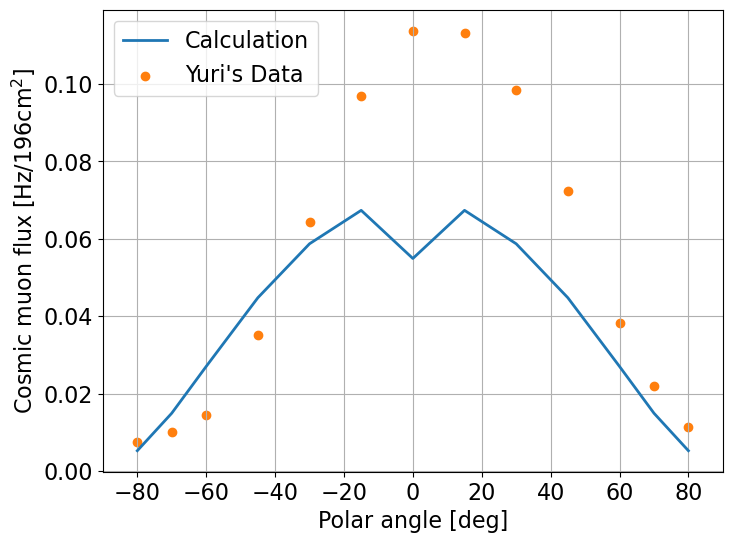

In [15]:
fig, ax = plt.subplots( figsize = (8, 6))  
ax.plot(thetaArray, IValue*196, lw = 2, label = r'Calculation' )
ax.scatter(thetaArray, Exp, c = '#ff7f0e', label = "Yuri's Data" )
ax.set_xlabel( r'Polar angle [deg]', fontsize = 16 )
ax.set_ylabel( r'Cosmic muon flux [Hz/196cm$^2$]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [-90, 90])
# ax.set_ylim( [0., 0.014] )
ax.grid(":")
ax.legend( fontsize = 16 )
# fig.savefig('CosmicMuonParam.png')

In [16]:
IArray = np.array([
    integrate.quad(dI_fixedTheta, pmin, pmax, args = (theta_c*np.pi/180))
    for theta_c in thetaArray
])
IArray

array([[2.26216917e-04, 5.98101255e-09],
       [7.38575584e-04, 1.44197453e-10],
       [1.36320281e-03, 2.59696312e-12],
       [2.26870611e-03, 3.35659239e-10],
       [2.97478624e-03, 2.79720885e-09],
       [3.41091007e-03, 7.62039025e-09],
       [3.55742589e-03, 1.02919625e-08],
       [3.41091007e-03, 7.62039025e-09],
       [2.97478624e-03, 2.79720885e-09],
       [2.26870611e-03, 3.35659239e-10],
       [1.36320281e-03, 2.59696312e-12],
       [7.38575584e-04, 1.44197453e-10],
       [2.26216917e-04, 5.98101255e-09]])

In [24]:
Iv[0]

0.0035574258942180173

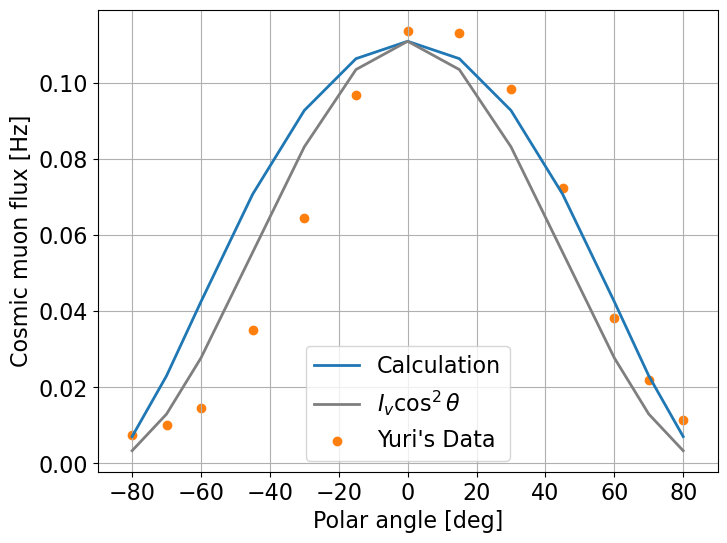

In [30]:
fig, ax = plt.subplots( figsize = (8, 6))  
ax.plot(thetaArray, IArray[:,0]*196*7/44, lw = 2, label = r'Calculation' )
ax.plot(thetaArray, Iv[0]*(np.cos(thetaArray*np.pi/180)**2)*196*7/44, lw = 2, c = 'tab:gray', label = r'$I_v\cos^2\theta$')
ax.scatter(thetaArray, Exp, c = 'tab:orange', label = "Yuri's Data" )
ax.set_xlabel( r'Polar angle [deg]', fontsize = 16 )
ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [-90, 90])
# ax.set_ylim( [0., 0.014] )
ax.grid(":")
ax.legend( fontsize = 16 )
# fig.savefig('CosmicMuonParam.png')

In [12]:
I3 = integrate.dblquad(dI, pmin, pmax, 0, np.pi/2)
I3

(0.009341633729411748, 1.3685533400372126e-08)

In [13]:
I1 = integrate.dblquad(dI, 1, pmax, 0, np.pi/2)
I1

(0.016506038288377364, 1.4630061449991351e-08)

In [14]:
I2 = integrate.dblquad(dI, 2, pmax, 0, np.pi/2)
I2

(0.012083836258816856, 1.3555685067234062e-08)

In [15]:
# The cryostat has an outer radius of 19" = 48.26cm, the area in cm^2 is
a = 48.26**2*np.pi
a

7316.855998167867

In [18]:
# Within the drift time, 187.5µs, the expected cosmic rays in each event
evtCR = I3[0]*a*187.5*1e-6
evtCR

0.012815885397325052